# Time Series Analysis of Uber Pickups in the Bronx

## Abstract

This report presents a comprehensive time series analysis of hourly Uber pickups in the Bronx. The study focuses on data preprocessing, exploratory analysis, and the development of forecasting models using ARIMA and Seasonal ARIMA (SARIMA) techniques. We detail the steps taken to stabilize variance, achieve stationarity, and capture both non-seasonal and seasonal patterns in the data. Despite challenges such as residual autocorrelation and complex seasonality, our findings offer valuable insights for predicting ride demand and provide suggestions for future improvements.


## Introduction

The goal of this project is to analyze hourly Uber pickup data from the Bronx, using time series techniques to model and forecast ride demand. Unlike previous studies that included multiple boroughs, this analysis focuses solely on the Bronx, ensuring a more detailed examination of local ride-hailing dynamics.

This report documents:
- Data preprocessing and transformation (including Box-Cox transformation and differencing).
- Exploratory data analysis to understand distributional properties and autocorrelation.
- Model identification using ARIMA and SARIMA methods.
- Model diagnostics and forecasting performance.

All references to other regions (e.g., Manhattan) have been removed to maintain focus on the Bronx data.

The results of this analysis will be used in a start-up project of carpooling application for the Algerian market -Nroho- to find out the influence of the time, weather and economic state of the location in the creation of rides and thus craft our pricing formula accordingly.

## About the data

The data is part of a dataset containing the number of trips in multiple locations in New York City. I have left only two neighberhood namely Manhattan and the Bronx, one of the city's richest neighberhood and one of its poorest. The dataset contains the follwoing collums:  

pickup_dt : Pick-up time (Steps are in hours)

borough : Location of the ride

pickups : Number of rides created in the location.

spd: Wind speed in miles/hour.

vsb: Visibility in Miles to nearest tenth

temp: temperature in Fahrenheit.

dewp: Dew point in Fahrenheit.

slp: Sea level pressure.

pcp01: 1-hour liquid precipitation.

pcp06: 6-hour liquid precipitation.

pcp24: 24-hour liquid precipitation.

sd: Snow depth in inches.

hday: Being a holiday (Y) or not (N).

* **Source:**  https://www.kaggle.com/datasets/yannisp/uber-pickups-enriched/data

* **Format:** CSV

* **Time:**  Recorded **Hourly**

* **Shape:**   4344 rows, 13 columns

As stated above, our work will be divided into various sections to make sure that we extract all the necessary information from the data.

## Data Loading and Preprocessing

In this section, the data is imported from a CSV file containing hourly Uber pickup counts in the Bronx. The datetime column is converted to a proper format, and the pickup counts are ensured to be numeric. The data is then transformed into a time series object with an hourly frequency.



In [ ]:
install.packages("googledrive")
library(googledrive)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

file <- drive_get("https://drive.google.com/drive/u/0/folders/1Xal7krarF9p6Qfcr_dsdScNqKV3tY6A0")

# Download the file to your working directory
drive_download(file, path = "Bronx.csv", overwrite = TRUE)


**IMPORTANT NOTE** If you are unable to get the data, please download it from the link. Thank you.

In [ ]:
data = read.csv("Bronx.csv")[ ,c('pickup_dt', 'pickups')]
head(data,n = 5)
tail(data, 5)


,pickup_dt,pickups
,<chr>,<int>
1,2015-01-01 01:00:00,152
2,2015-01-01 02:00:00,120
3,2015-01-01 03:00:00,132
4,2015-01-01 04:00:00,128
5,2015-01-01 05:00:00,87


,pickup_dt,pickups
,<chr>,<int>
4339,2015-06-30 19:00:00,88
4340,2015-06-30 20:00:00,66
4341,2015-06-30 21:00:00,57
4342,2015-06-30 22:00:00,53
4343,2015-06-30 23:00:00,67


In [ ]:
data_pickups = data$pickups
data_pickups

[1] 152 120 132 128  87  65  25  17  13  14  14  12  18  23  21  19  39  28
  [19]  26  33  30  32  27  24  19  16   7  10   9   7  15  11  10  21  21  26
  [37]  30  16  19  24  35  29  34  36  29  44  53  44  27  30  14  20  14  15
  [55]  12  14  14  13  18  24  27  36  37  32  37  40  48  66  49  49  39  33
  [73]  35  33  32  12  18  10  14  17  13  22  17  25  28  32  24  31  35  24
  [91]  36  25  32  20  22  16   7   6   5   6   9  14  25  29  31  21  18  27
 [109]  22  18  29  28  36  22  34  24  21  15  24  18  10   9   9   6  10  16
 [127]  25  31  22  27  23  31  22  37  27  40  38  45  38  32  31  35  19  14
 [145]   7   7   5   5  11  11  21  40  33  28  24  19  14  27  48  28  35  41
 [163]  35  33  38  31  35  27  14   6   9   3  10  15  40  57  29  22  25  21
 [181]  33  29  46  52  49  46  39  39  36  37  20  29  16   6   9   4   6  14
 [199]  37  56  56  32  23  24  19  34  46  34  53  45  36  42  54  47  36  35
 [217]  28  28  12  14  16  16  13  23  20  27  22  36  32  25  38  42  45  46
 [235]  45  47  58  62  63  59  49  34  20  25   8  13  17  15  19  19  22  21
 [253]  33  37  33  37  46  39  40  43  28  29  21  21  14  11   4   3   9  14
 [271]  30  42  37  40  26  33  25  33  36  44  39  41  30  29  29  25  29  17
 [289]  19   7   7   8   8  17  17  37  45  21  23  21  22  28  33  45  54  37
 [307]  41  38  26  34  26  20  19   7  10   9  10  17  22  57  39  21  34  40
 [325]  33  37  42  33  46  42  31  34  32  24  14  22  10   7   5   2   9  22
 [343]  28  48  31  33  40  47  37  33  53  46  42  35  38  40  30  32  36  20
 [361]  17  15  16   8  11  19  26  49  40  36  35  30  36  46  68  42  38  52
 [379]  58  45  53  55  41  52  36  28  32  25  18  10  11  19  55  40  32  45
 [397]  41  44  46  50  52  53  58  68  50  67  59  55  53  54  46  30  26  13
 [415]  11  14  38  46  45  53  62  51  60  53  49  55  57  38  44  36  40  33
 [433]  22  24  13  17  10  20  15  26  28  22  22  20  25  31  32  31  35  43
 [451]  36  29  32  28  24  19  12   8   8   6  11  17  25  46  37  17  26  27
 [469]  25  36  34  43  36  38  30  34  34  31  26  19  10   8   7   9   4   7
 [487]  16  50  33  30  47  26  23  23  45  39  36  53  30  35  31  29  21  25
 [505]   9  15   9   7   6  13  33  50  38  27  32  22  24  33  48  35  46  53
 [523]  33  25  33  32  34  22  14  12   9  14   6  20  40  51  43  31  35  23
 [541]  28  39  41  45  43  39  49  33  37  53  47  51  33  40  25  20  22  15
 [559]  14  22  22  25  33  38  38  27  27  28  44  55  65  61  61  61  53  54
 [577]  43  53  32  31  15   9   8  14  23  27  28  34  38  42  35  32  37  38
 [595]  34  36  38  34  36  33  18  11   4   8  12  23  37  53  37  29  26  29
 [613]  27  38  42  42  32  34  25  12   9   9   0   0   0   0   0   0   0   0
 [631]   0   1   9  25  20  25  13  11  28  13  32  35  29  23  25  24  24  22
 [649]  11   3   8   3   8  16  39  69  49  37  31  23  31  27  44  41  47  51
 [667]  32  30  43  44  20  18  10  10   3   4  10  11  30  57  55  34  34  19
 [685]  36  48  45  42  52  54  35  42  40  23  31  28  17  12   5   6   8  16
 [703]  48  70  57  45  33  34  38  40  38  58  47  60  56  59  58  54  55  43
 [721]  52  31  21  22  17  13  12  28  34  30  36  44  42  45  53  47  42  72
 [739]  77  64  67  72  55  59  59  42  36  29  23  15  16  15  25  21  29  40
 [757]  39  37  48  46  77  82  61  40  51  71  93  68  32  21  10  11   8  24
 [775]  45  43  51  44  37  29  34  44  39  42  38  44  35  28  27  21  19  15
 [793]  15   7   1   4  14  22  46  54  52  39  36  33  32  38  47  54  62  50
 [811]  67  49  34  36  31  30  17   6   4   8  14  17  38  74  56  35  30  35
 [829]  43  41  41  55  47  62  44  36  41  44  31  27  15   5   2   4  16  20
 [847]  41  67  49  45  42  35  34  50  44  49  50  61  55  58  50  37  40  26
 [865]  28   9   8  12  17  23  48  76  42  44  32  34  39  56  63  63  74  73
 [883]  75  56  62  60  51  49  40  48  28  31  19  19  22  29  38  46  40  47
 [901]  45  37  51  59  50  75  71  91  71  85  72 10

In [ ]:
install.packages("xts")
library(xts)

timestamps <- seq(from = as.POSIXct("2015-01-01 01:00:00"),
                  to   = as.POSIXct("2015-06-30 23:00:00"),
                  by   = "hour")

# Make sure lengths match
length(timestamps)  # should match length(data_pickups)
length(data_pickups)

# Create xts
ts_data <- xts(data_pickups, order.by = timestamps)





Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[1] 4343

[1] 4343

In [ ]:
class(ts_data)

[1] "xts" "zoo"

In [ ]:
any(is.na(ts_data))

[1] FALSE

In [ ]:
ts_data_numeric = as.numeric(ts_data)

In [ ]:
class(ts_data_numeric)

[1] "numeric"

## Exploratory Data Analysis

This section explores the properties of the time series. We begin with visualizing the series over time, followed by examining the distribution through histograms and Q-Q plots. Formal tests, including the Shapiro-Wilk test for normality and the Augmented Dickey-Fuller (ADF) test for stationarity, are conducted to assess the data characteristics.

Key objectives:
- Identify trends, seasonality, and outliers.
- Check for non-stationarity and possible heteroscedasticity.
- Prepare the series for further modeling.


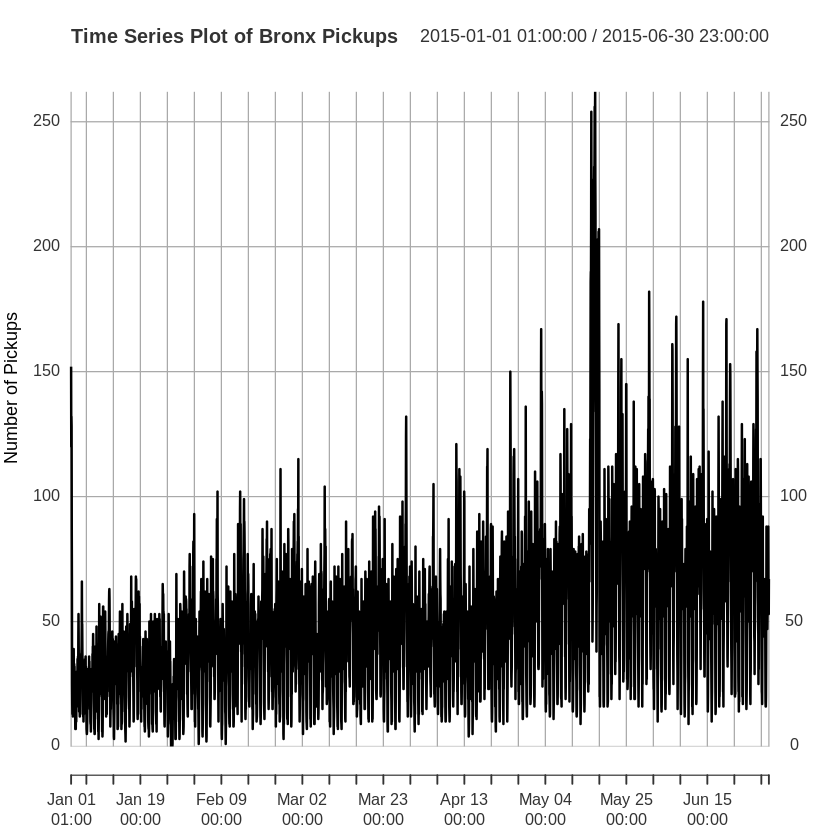

In [ ]:
plot(ts_data,
     type = "l",
     xlab = "Date/Time",
     ylab = "Number of Pickups",
     main = "Time Series Plot of Bronx Pickups")

Looking at the time series of hourly Uber pickups in the Bronx, we can observe:

1. **Potential Seasonality**: The pattern seems to repeat daily (every 24 hours), indicating a strong day‐night cycle in demand.
2. **Trends**: It looks like there may be a slight increase in the average number of pickups over time, but we need further analysis to confirm this.
3. **Outliers**: We see a few points that are significantly higher than the surrounding data. These could be special events, holidays, or data anomalies.

Overall, this initial plot suggests that further statistical tests are needed to identify trends, seasonality, and any structural changes in the data. We will investigate these aspects more deeply in the upcoming sections.

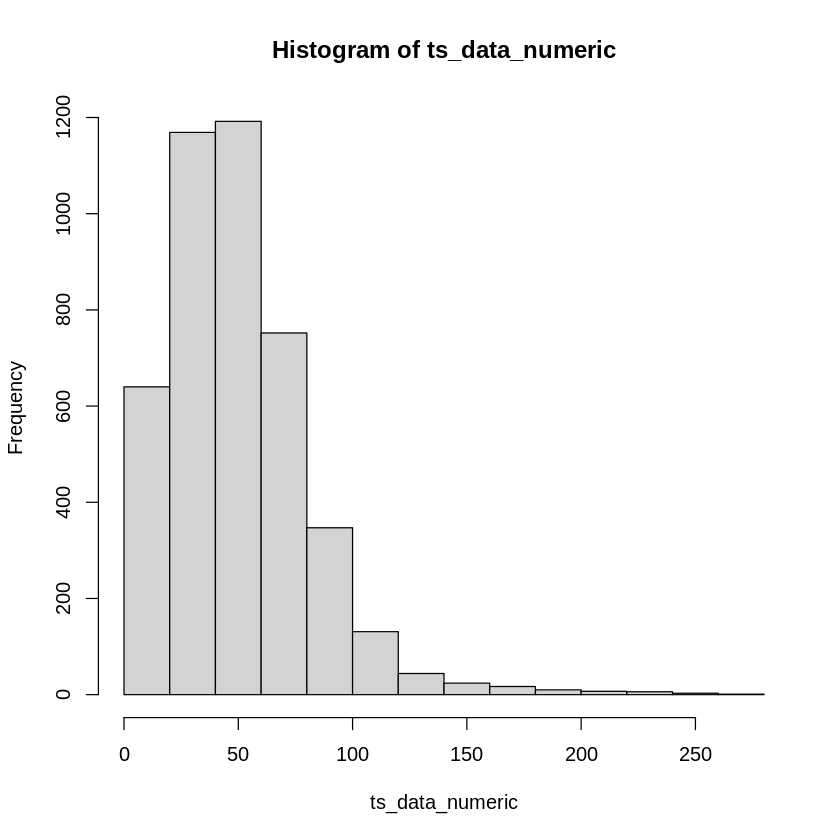

In [ ]:
hist(ts_data_numeric)

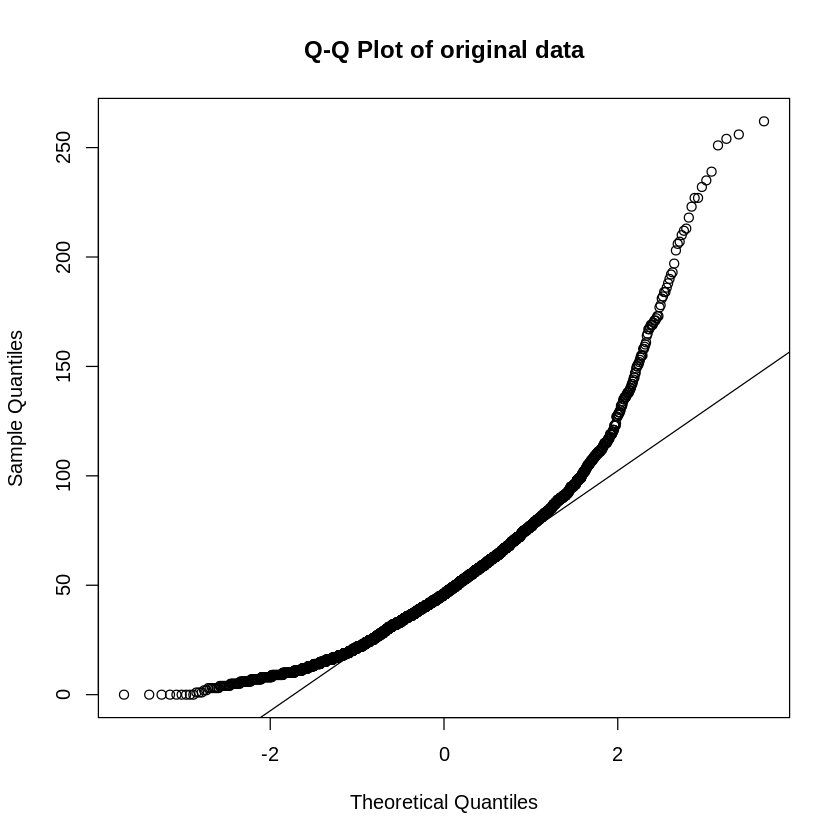

In [ ]:
qqnorm(ts_data_numeric, main = "Q-Q Plot of original data")
qqline(ts_data_numeric)

1. **Histogram**  
   - The data appears **right‐skewed**: most pickup counts are relatively low, with a long tail extending to higher values.
   - A single peak around the lower ranges (under 50 pickups per hour) suggests that many hours have relatively few rides.

2. **Q-Q Plot**  
   - The Q-Q plot deviates significantly from the straight line, especially in the upper quantiles (right side).
   - This confirms the distribution is **not normally distributed**—the data has heavier tails and is skewed.

These observations imply that normality‐based methods (e.g., standard ARIMA assumptions) may need variance‐stabilizing transformations (e.g., log or Box-Cox) before we apply certain time series models. But again we need to be more rigorous and do mathematical tests and make sure our hypothesis :).


In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_result <- shapiro.test(ts_data_numeric)

shapiro_result


	Shapiro-Wilk normality test

data:  ts_data_numeric
W = 0.90166, p-value < 2.2e-16


We see that the p-value is less than 0.05 which suggests that we can reject the null hypothesis (i.e., data is not normal). We are confiming the heavy skew we observed in the former plots (Histogram and Q-Q plot).

## Variance Stabilization and Differencing

Given the skewed nature of the raw pickup data, a Box-Cox transformation is applied to stabilize the variance. Following this, a first difference is taken to remove any linear trends and render the series stationary. The effectiveness of these transformations is confirmed through visual plots and the ADF test.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘x13binary’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”


[1] 0.4223642

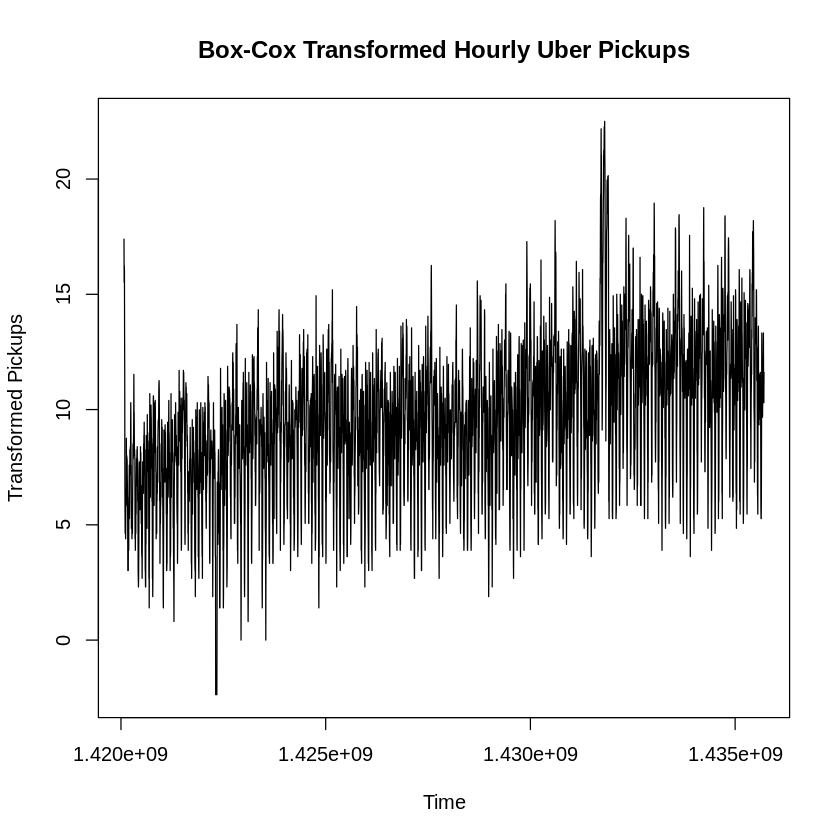

In [ ]:
# If you haven't installed forecast, do so:
install.packages('forecast', dependencies = TRUE)

library(forecast)

# Perform Box-Cox transformation with auto-selected lambda
data_boxcox <- BoxCox(ts_data, lambda = "auto")

# Convert it back to a time series object with the same frequency and start
ts_data_boxcox <- ts(data_boxcox,
                     frequency = frequency(ts_data),
                     start = start(ts_data))

# Let's check the lambda used
lambda_value <- attr(ts_data_boxcox, "lambda")
lambda_value

# Plot the transformed series
plot(ts_data_boxcox,
     type = "l",
     main = "Box-Cox Transformed Hourly Uber Pickups",
     ylab = "Transformed Pickups"
)


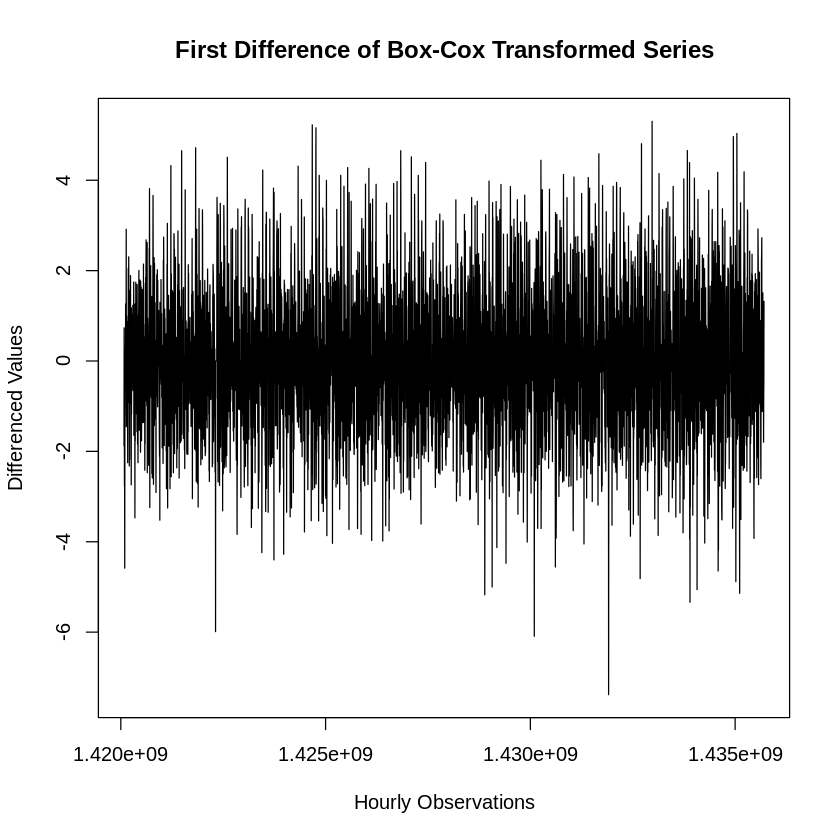

In [ ]:
# 1. First Difference
ts_data_boxcox_diff <- diff(ts_data_boxcox)

# 2. Plot the differenced series
plot(ts_data_boxcox_diff,
     type = "l",
     main = "First Difference of Box-Cox Transformed Series",
     xlab = "Hourly Observations",
     ylab = "Differenced Values"
)


In [ ]:

install.packages("tseries")
library(tseries)

# Augmented Dickey-Fuller Test
adf_result <- adf.test(ts_data_boxcox_diff)

adf_result


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in adf.test(ts_data_boxcox_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts_data_boxcox_diff
Dickey-Fuller = -28.044, Lag order = 16, p-value = 0.01
alternative hypothesis: stationary


### Discussion of First Differencing and ADF Test

1. **First Difference of the Box-Cox Transformed Series**  
   - The plot shows that after differencing, the data appears to fluctuate around a constant mean (close to zero).  
   - Large spikes still occur, but the overall pattern suggests the removal of any strong trend.

2. **Augmented Dickey-Fuller (ADF) Test**  
   - **p-value = 0.01**, which is below 0.05.  
   - We reject the null hypothesis of a unit root, indicating that our differenced, Box-Cox transformed series is now **stationary**.

This result confirms that applying both the Box-Cox transformation and a first difference has made our data suitable for ARIMA modeling. Next, we will analyze the autocorrelation structure (ACF/PACF) to identify appropriate model orders.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’



Attaching package: ‘DescTools’


The following object is masked from ‘package:forecast’:

    BoxCox




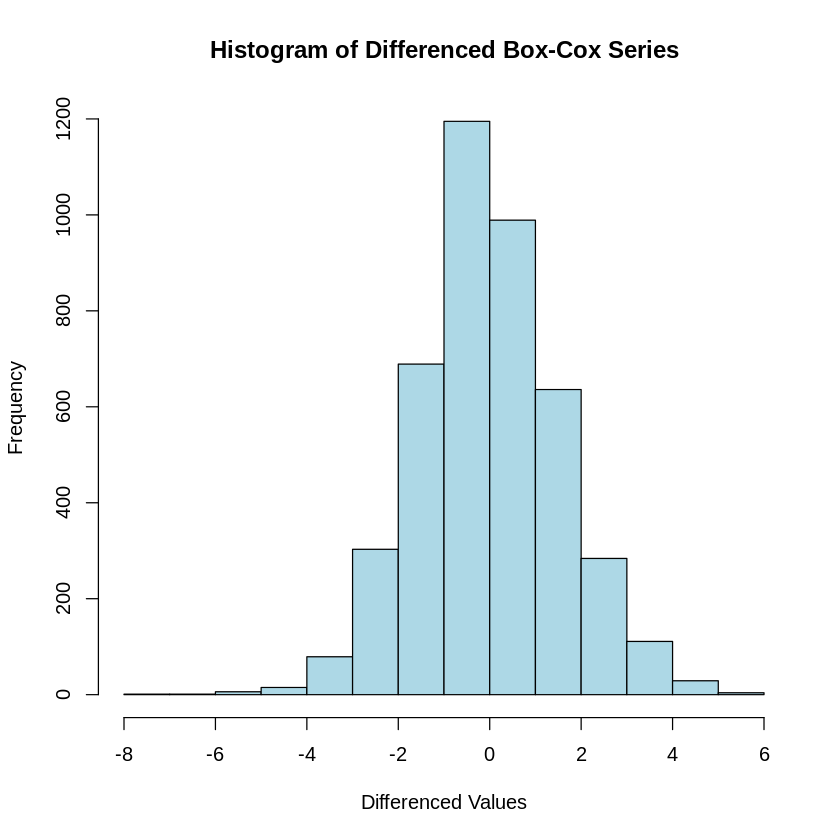


	Shapiro-Wilk normality test

data:  ts_data_boxcox_diff
W = 0.99763, p-value = 2.9e-06



	Runs Test for Randomness

data:  ts_data_boxcox_diff
z = -2.1034, runs = 2096, m = 2289, n = 2053, p-value = 0.03543
alternative hypothesis: true number of runs is not equal the expected number
sample estimates:
median(x) 
        0 


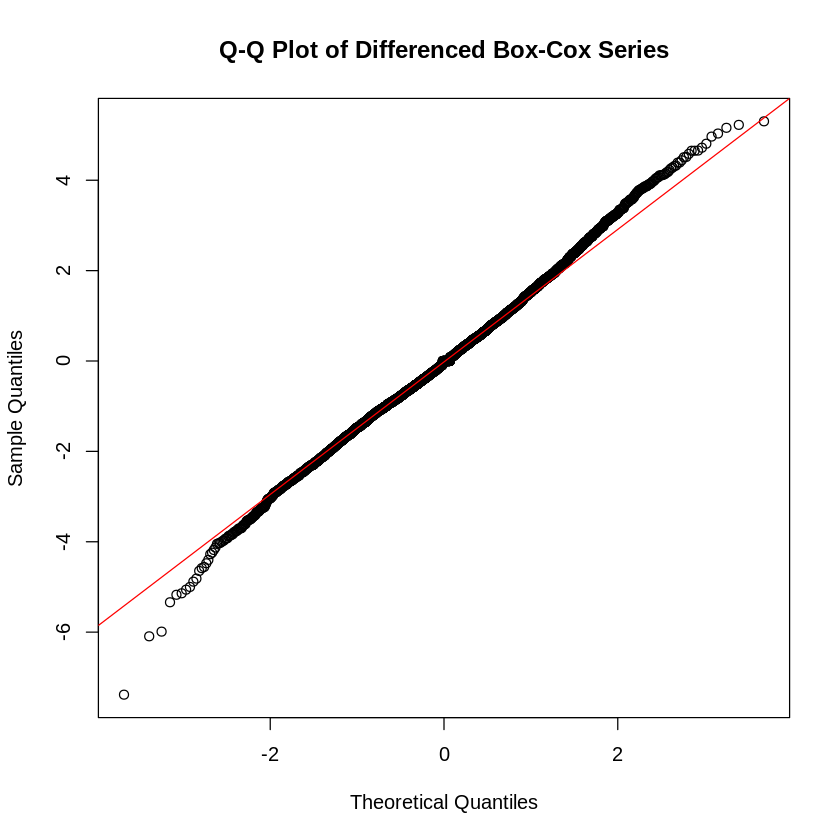

In [ ]:
# If not already installed, install DescTools for the Runs Test:
install.packages("DescTools")

library(DescTools)

# 1. Histogram of differenced data
hist(ts_data_boxcox_diff,
     main = "Histogram of Differenced Box-Cox Series",
     xlab = "Differenced Values",
     col = "lightblue",
     border = "black"
)

# 2. Q-Q Plot
qqnorm(ts_data_boxcox_diff,
       main = "Q-Q Plot of Differenced Box-Cox Series"
)
qqline(ts_data_boxcox_diff, col = "red")

# 3. Shapiro-Wilk Test for Normality
shapiro_result_diff <- shapiro.test(ts_data_boxcox_diff)
shapiro_result_diff

# 4. Runs Test for Randomness
runs_result_diff <- RunsTest(ts_data_boxcox_diff)
runs_result_diff


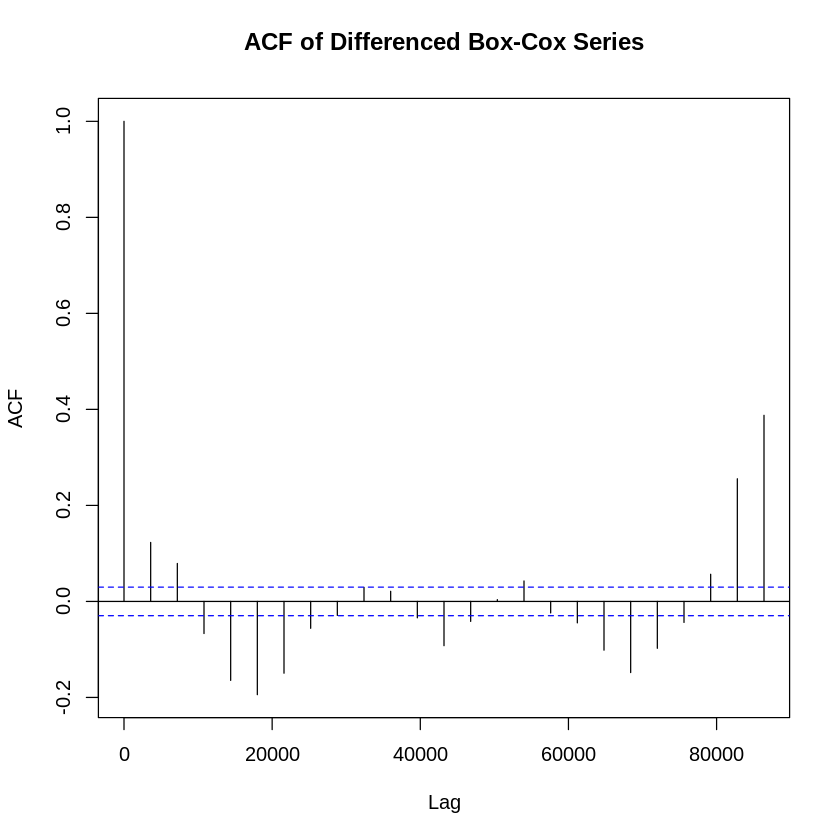

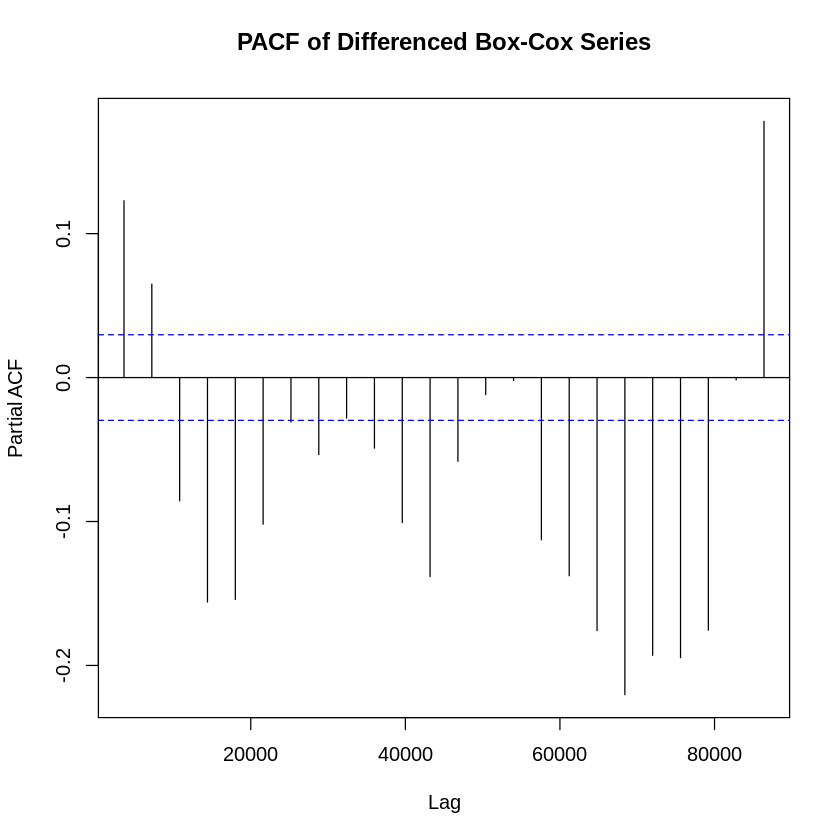

In [ ]:
# Autocorrelation Function
acf(ts_data_boxcox_diff, main = "ACF of Differenced Box-Cox Series", lag.max = 24)

# Partial Autocorrelation Function
pacf(ts_data_boxcox_diff, main = "PACF of Differenced Box-Cox Series", lag.max = 24)


### Distribution, Normality, and Independence Checks

1. **Histogram & Q-Q Plot of the Differenced Box-Cox Series**  
   - The histogram appears closer to a bell-shaped curve compared to the original data, although still not perfectly symmetric.  
   - The Q-Q plot shows most points lying near the diagonal line, but slight deviations at the tails.  
   - **Shapiro-Wilk Test (p-value = 2.9e-06)**: We can reject the null hypothesis of normality, so the data is still not strictly normal. However, it is far less skewed than before the Box-Cox transformation and differencing.

2. **Runs Test (p-value ≈ 0.035)**  
   - The p-value is slightly below 0.05, suggesting we reject the null hypothesis of complete randomness.  
   - This indicates there may still be some dependence or pattern left in the data, which is normal in a time series context.

3. **ACF and PACF**  
   - We see several significant spikes, which will help guide our model selection.  
  
*Small Note for me:*  The Lag axis is large  because the `ts` object’s underlying time index is in a large numeric scale referencing seconds. When I did lag.max= 24 We got lag ~86000 and we have
24 x 60 x 60 = 86400
     


Overall, these diagnostics confirm:
- The differenced, Box-Cox transformed data is **stationary** (per ADF).  
- It is **not fully normal** (per Shapiro-Wilk), but that’s common in real-world data.  
- There is **some correlation structure** left to model (as seen in the ACF/PACF and runs test).  
- We can proceed with ARIMA modeling using this transformed, differenced series.


## Model Identification and Residual Diagnostics

This section details the identification of candidate ARIMA and SARIMA models for the transformed series. We explore various combinations of non-seasonal and seasonal orders by examining information criteria (AIC/BIC) and using visual tools such as ACF and PACF plots.

Residual diagnostics are crucial at this stage. We assess the fitted models by checking:
- The Ljung-Box test for residual autocorrelation.
- The normality of residuals via the Shapiro-Wilk test.
- The overall model performance (AIC/BIC values).

Persistent autocorrelation in the residuals indicates that further refinements, such as seasonal adjustments or additional differencing, may be necessary.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




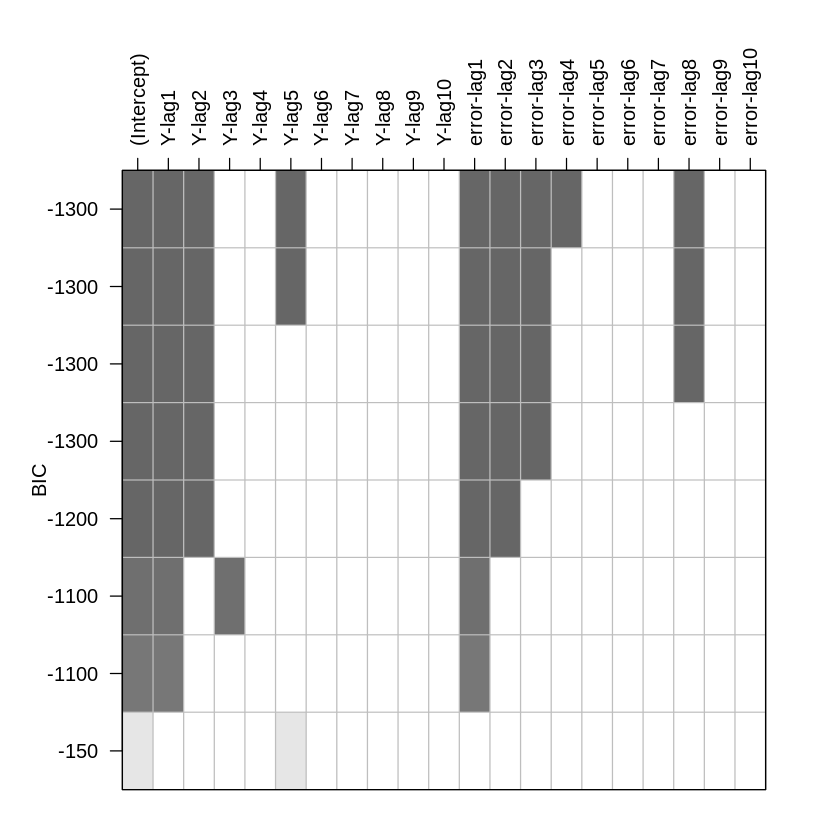

In [ ]:

install.packages("TSA")
library(TSA)


diff_data_numeric <- as.numeric(ts_data_boxcox_diff)


subsets_plot <- armasubsets(y = diff_data_numeric, nar = 10, nma = 10,)

# Plot the results
plot(subsets_plot)


### Interpreting the ARMA Subsets Plot

1. **Plot Explanation**  
   - The rows represent different ARMA(\(p,q\)) models tested on the *differenced* data.
   - Dark or filled squares usually indicate the inclusion of that lag (e.g., \(y\)-lag1 = AR(1), error-lag1 = MA(1)).
   - The y-axis indicates the information criterion value for each model. Typically, **lower is better**.

3. **Next Steps**  
   - We will fit a few of these top candidates (e.g., ARIMA(\(p,1,q\))) on our **original** `ts_data` (because we differenced manually).  
   - Then we’ll compare their **AIC/BIC** and perform **residual diagnostics** to find the model whose residuals look most like white noise.


Series: ts_data 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.0844
s.e.  0.0151

sigma^2 = 227.1:  log likelihood = -17938.9
AIC=35881.79   AICc=35881.8   BIC=35894.55

Training set error measures:
                      ME     RMSE      MAE MPE MAPE      MASE          ACF1
Training set -0.01758766 15.06581 11.22849 NaN  Inf 0.2216133 -7.175138e-05


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 177.83, df = 9, p-value < 2.2e-16

Model df: 1.   Total lags used: 10



Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: ts_data 
ARIMA(2,1,1) 

Coefficients:
         ar1     ar2    ma1
      0.0417  0.0066  0.042
s.e.     NaN     NaN    NaN

sigma^2 = 227.2:  log likelihood = -17938.88
AIC=35885.76   AICc=35885.77   BIC=35911.26

Training set error measures:
                      ME     RMSE     MAE MPE MAPE      MASE         ACF1
Training set -0.01753693 15.06575 11.2272 NaN  Inf 0.2215878 0.0008242118

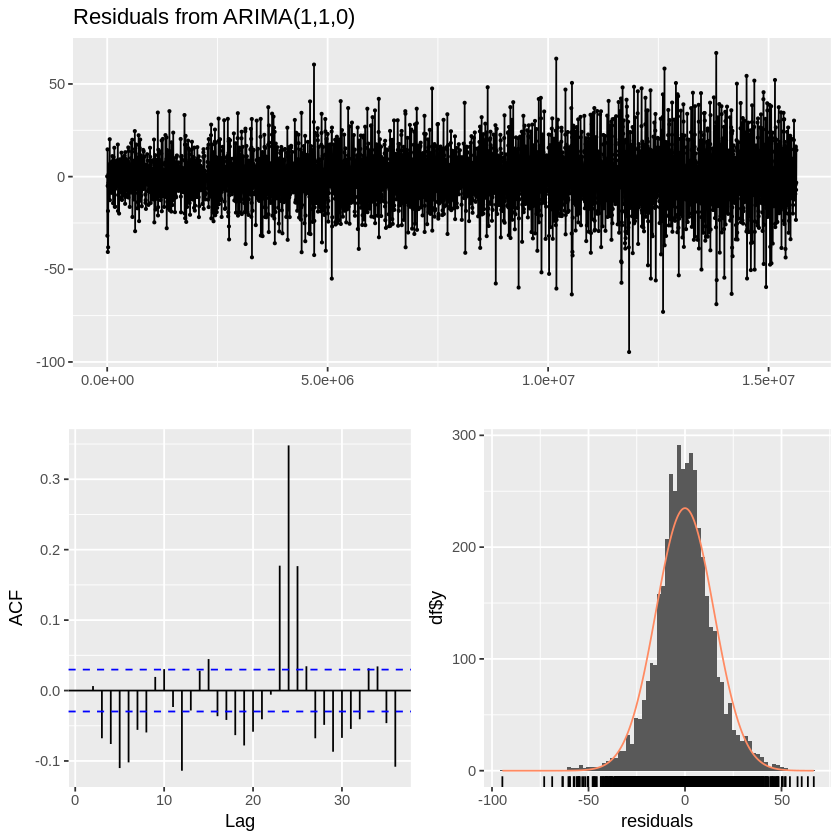


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)
Q* = 177, df = 7, p-value < 2.2e-16

Model df: 3.   Total lags used: 10

Model (1,1,0): AIC = 35881.79 ; BIC = 35894.55 
Model (2,1,1): AIC = 35885.76 ; BIC = 35911.26 


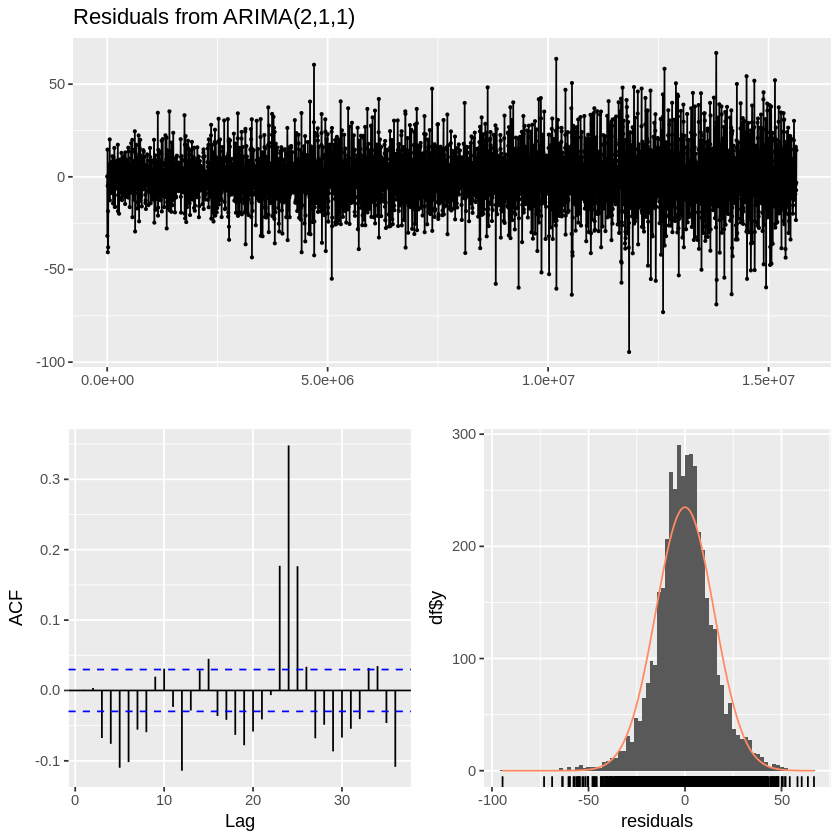

In [ ]:
library(forecast)

# Candidate 1: ARIMA(1,1,0)
model_110 <- Arima(ts_data, order = c(1, 1, 0))
summary(model_110)
checkresiduals(model_110)

# Candidate 2: ARIMA(2,1,1)
model_211 <- Arima(ts_data, order = c(2, 1, 1))
summary(model_211)
checkresiduals(model_211)

# Compare AIC/BIC
cat("Model (1,1,0): AIC =", model_110$aic, "; BIC =", model_110$bic, "\n")
cat("Model (2,1,1): AIC =", model_211$aic, "; BIC =", model_211$bic, "\n")


Even if, graphically the residuals appears to have a bell shape and follows a Gaussian distribution, and also may be thought as a white noise. However, we see that the ACF plots suggests the presence again of autocorrelation which is confirmed by the **Ljung-Box Test** that is showing a very small p-value (< 0.05).
Overall, while these models fit better than simpler models, the significant autocorrelation in the residuals indicates further refinement is needed to achieve a white-noise residual structure.
We will brute-force the remaining possible values of p and q from the BIC plot, if we don't get any improvement then we definitely need to switch to a a model that will capture *seasonality*.

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: ts_data 
ARIMA(5,1,8) 

Coefficients:
         ar1      ar2      ar3     ar4      ar5      ma1     ma2    ma3     ma4
      0.1410  -0.2510  -0.6755  0.5596  -0.0123  -0.1868  0.2209  0.555  -0.774
s.e.  0.0393   0.0142   0.0168  0.0343   0.0386   0.0365  0.0096    NaN   0.022
          ma5      ma6      ma7      ma8
      -0.2308  -0.2180  -0.1873  -0.1388
s.e.   0.0363   0.0197   0.0188   0.0181

sigma^2 = 191.1:  log likelihood = -17561.61
AIC=35151.22   AICc=35151.31   BIC=35240.48

Training set error measures:
                    ME     RMSE      MAE  MPE MAPE      MASE        ACF1
Training set 0.1596914 13.80269 10.32984 -Inf  Inf 0.2038768 0.004626785


	Ljung-Box test

data:  Residuals from ARIMA(5,1,8)
Q* = 17.639, df = 3, p-value = 0.0005221

Model df: 13.   Total lags used: 16

Model (5,1,8): AIC = 35151.22 ; BIC = 35240.48 


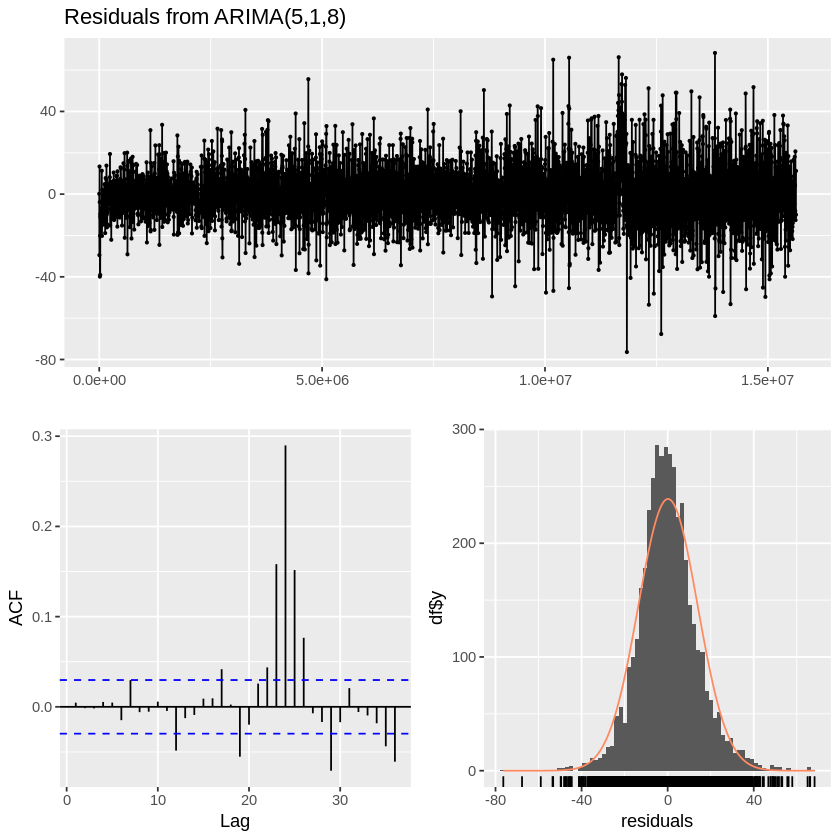

In [ ]:
# Candidate 3: ARIMA(3,1,2)
model_518 <- Arima(ts_data, order = c(5, 1, 8))
summary(model_518)
checkresiduals(model_518)

# Compare AIC/BIC
cat("Model (5,1,8): AIC =", model_518$aic, "; BIC =", model_518$bic, "\n")


We tried several values for p and q manually from the upper possible values and these ones are the best we have got (p = 5 and q = 8). We see that the BIC score has decreased and also  we are noticing a strong improvement in the p-value of the Ljung-Box test but it is still below 0.05 which forces us to believe that ARIMA alone will not work with this data due to a possible seasonality.
We need to consider **seasonal effects**: Since the data is hourly, there may be daily or weekly cycles to include in a seasonal ARIMA. The presence of a big spike at around lag 24, which suggest a daily cycle. A hypothesis that needs to be tested but that defenitely makes sense for various reasons:


- The natural existence of rush hours (Morning, Noon, and Evening at the end of the work)


- The influence of the weather (At night it's colder which may imply that people tend to book a ride)  


## Seasonal ARIMA (SARIMA) Modeling

Given the hourly frequency of the data, seasonal patterns (e.g., daily cycles) are expected. We extend our analysis to SARIMA models by incorporating seasonal differencing and seasonal AR/MA terms. The seasonal period is set to 24 to capture daily fluctuations, with further adjustments made based on diagnostic checks.

Advanced approaches such as dynamic harmonic regression (e.g., using Fourier terms) and TBATS were also considered but did not fully resolve the residual autocorrelation. This highlights the inherent complexity of ride-hailing data.


Warning message in adf.test(ts_data_boxcox_diff_seasonal):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts_data_boxcox_diff_seasonal
Dickey-Fuller = -24.884, Lag order = 16, p-value = 0.01
alternative hypothesis: stationary


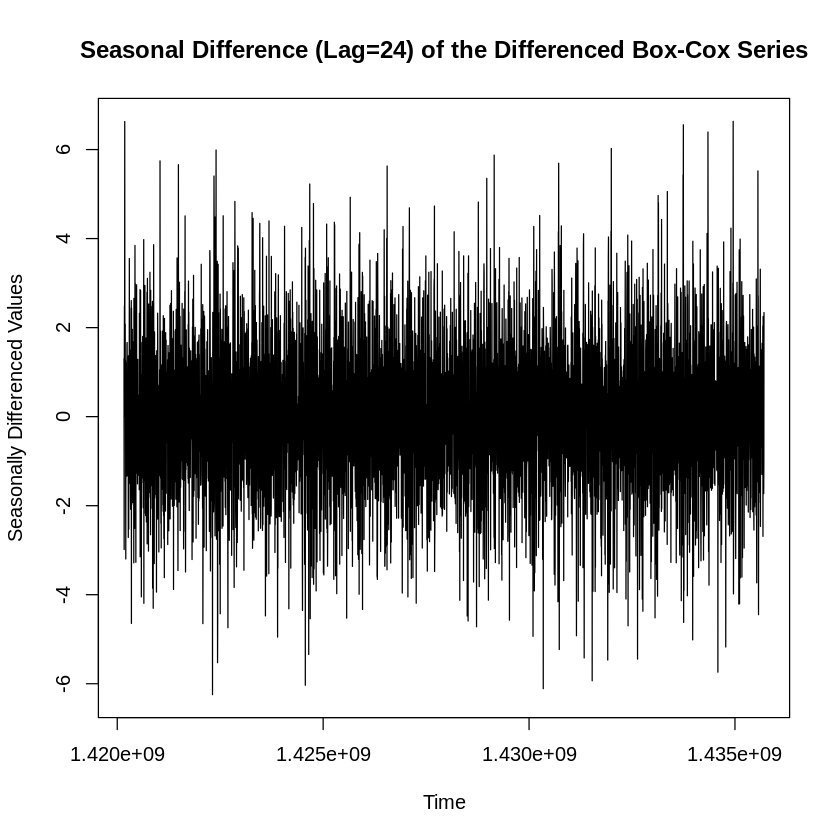

In [ ]:
# Seasonal differencing by 24 lags
ts_data_boxcox_diff_seasonal <- diff(ts_data_boxcox_diff, lag = 24)

# Plot the seasonally differenced series
plot(ts_data_boxcox_diff_seasonal,
     type = "l",
     main = "Seasonal Difference (Lag=24) of the Differenced Box-Cox Series",
     ylab = "Seasonally Differenced Values"
)

# ADF test on the seasonally differenced data
library(tseries)
adf_seasonal <- adf.test(ts_data_boxcox_diff_seasonal)
adf_seasonal


Here we see that the ADF p-value is below 0.05 which conclude that (with seasonal differencing) the data is more stationary. Hypothesis is accepted.

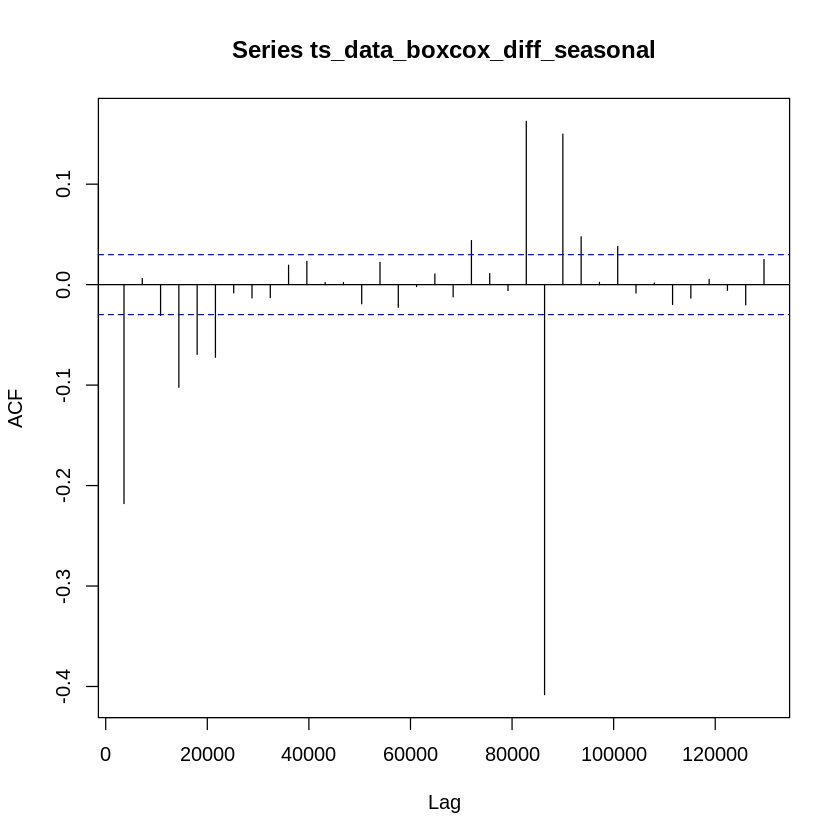

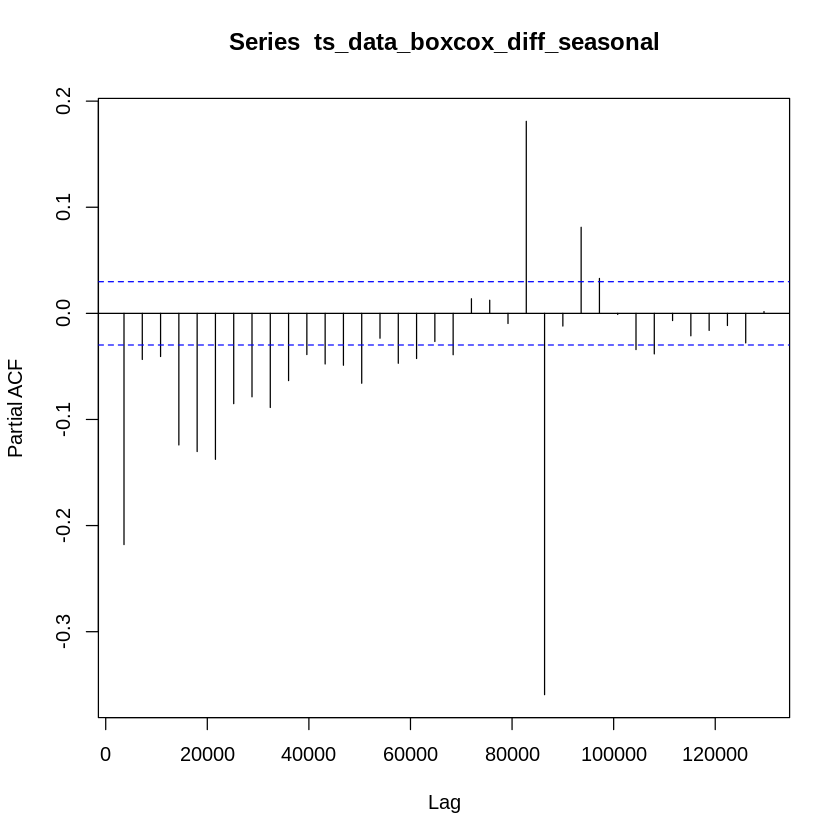

In [ ]:
acf(ts_data_boxcox_diff_seasonal)
pacf(ts_data_boxcox_diff_seasonal)

Series: ts_data 
ARIMA(3,1,2)(0,1,1)[24] 

Coefficients:
         ar1      ar2      ar3      ma1     ma2     sma1
      1.0416  -0.1060  -0.0638  -1.2446  0.2478  -0.9560
s.e.  0.2148   0.1691   0.0211   0.2147  0.2145   0.0048

sigma^2 = 149.9:  log likelihood = -16973.47
AIC=33960.95   AICc=33960.97   BIC=34005.54

Training set error measures:
                    ME    RMSE      MAE MPE MAPE      MASE         ACF1
Training set 0.2251728 12.2006 9.052507 NaN  Inf 0.1786666 -0.000908727


	Ljung-Box test

data:  Residuals from ARIMA(3,1,2)(0,1,1)[24]
Q* = 19.876, df = 4, p-value = 0.0005282

Model df: 6.   Total lags used: 10



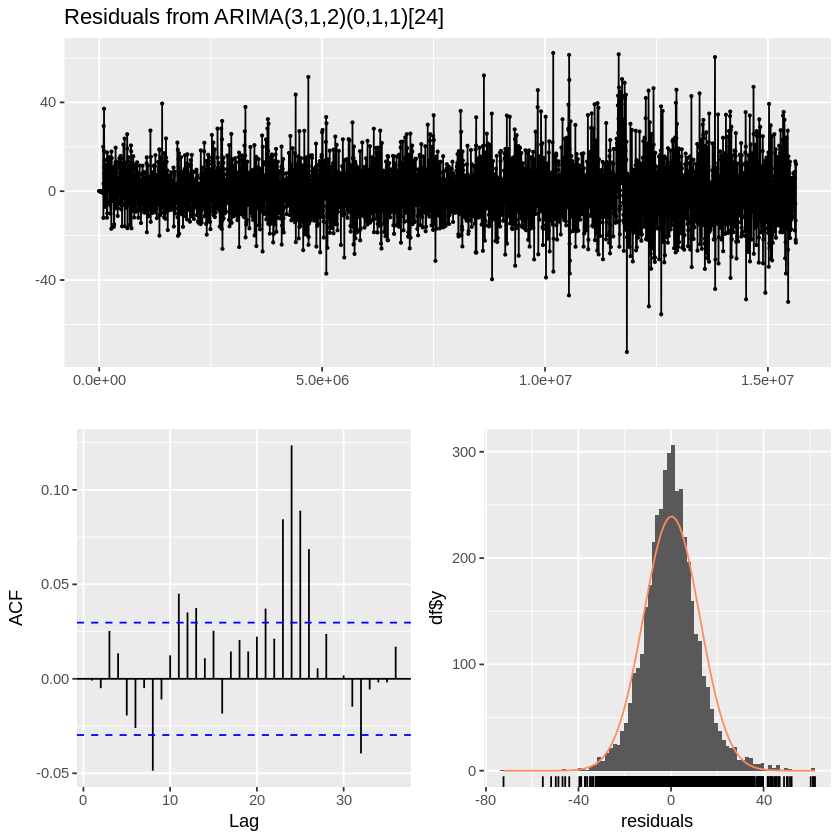

In [ ]:
library(forecast)

#
model_sarima <- Arima(ts_data,
                      order = c(3, 1, 2),
                      seasonal = list(order = c(0, 1, 1), period = 24)) # Changed here: Pass period inside the seasonal list


summary(model_sarima)

# Residual Diagnostics
checkresiduals(model_sarima)

Since the p-value for the Ljung-Box is still below 0.05, and the ACF plot suggests that the seasonality wasn't captured, a naive approach is to iterate over some values of p,q, P, Q. This approach is obviously not the best but we are permitting it for the sake of experimentation.

In [ ]:
library(forecast)

best_aic <- Inf
best_model <- NULL
best_order <- c(0,0,0)
best_seasonal <- c(0,0,0)


for(p in 0:2){
  for(q in 0:2){
    for(P in 0:1){
      for(Q in 0:1){

        # Fit the model
        fit <- Arima(ts_data,
                     order = c(p, 1, q),          # (p,d,q)
                     seasonal = list(order = c(P, 1, Q), period = 24))

        # Check AIC
        current_aic <- fit$aic


        if(current_aic < best_aic){
          best_aic <- current_aic
          best_model <- fit
          best_order <- c(p,1,q)
          best_seasonal <- c(P,1,Q)
        }
      }
    }
  }
}

cat("Best Model:\n")
cat("Non-seasonal order: (", best_order[1], ",", best_order[2], ",", best_order[3], ")\n")
cat("Seasonal order: (", best_seasonal[1], ",", best_seasonal[2], ",", best_seasonal[3], ")\n")
cat("AIC:", best_aic, "\n")

summary(best_model)
checkresiduals(best_model)


ERROR: Error in parse(text = input): <text>:37:6: unexpected symbol
36: 
37: cat("Best
         ^


Here, we see that the daily SARIMA model is getting better since BIC has deacreased however it fails again in the Ljung-Box test, showing that seasonality still occurs. A hypothesis that can be taken in the presence of weekely seasonalilty for a possible reason:

- Existence of cycle, where weekends, beginning of the week have their influence on the overall timeseries.

We will try to create a model that captures both seasonality; daily and weekely.

                  Length Class  Mode     
lambda                 0 -none- NULL     
alpha                  1 -none- numeric  
beta                   1 -none- numeric  
damping.parameter      1 -none- numeric  
gamma.one.values       2 -none- numeric  
gamma.two.values       2 -none- numeric  
ar.coefficients        4 -none- numeric  
ma.coefficients        3 -none- numeric  
likelihood             1 -none- numeric  
optim.return.code      1 -none- numeric  
variance               1 -none- numeric  
AIC                    1 -none- numeric  
parameters             2 -none- list     
seed.states           37 -none- numeric  
fitted.values       4343 msts   numeric  
errors              4343 msts   numeric  
x                 160691 -none- numeric  
seasonal.periods       2 -none- numeric  
k.vector               2 -none- numeric  
y                   4343 msts   numeric  
p                      1 -none- numeric  
q                      1 -none- numeric  
call                   2 -none- ca


	Ljung-Box test

data:  Residuals from TBATS
Q* = 1632.6, df = 336, p-value < 2.2e-16

Model df: 0.   Total lags used: 336



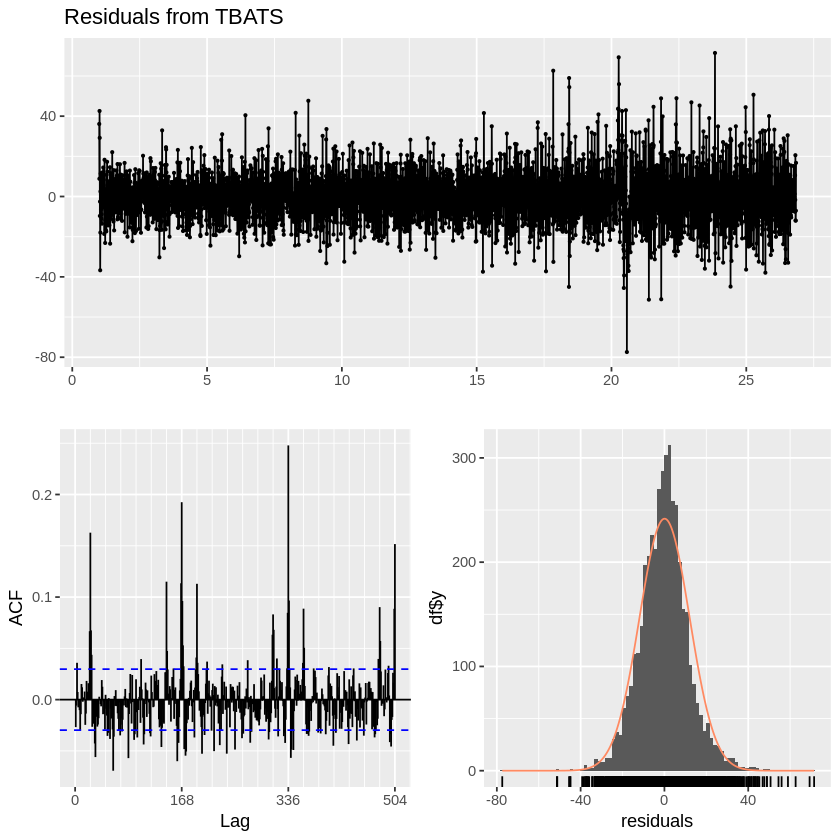

In [ ]:
library(forecast)

ts_data_msts <- msts(data_pickups, seasonal.periods = c(24, 168))

model_tbats <- tbats(ts_data_msts)

summary(model_tbats)
checkresiduals(model_tbats)


Unfortunately we are seeing the presence of more seasonality, showing that this approach with this model did not get us any improvement. For now the SARIMA model has offered us best resusls.
*Note:* Here is where I found about the model  https://medium.com/analytics-vidhya/time-series-forecasting-using-tbats-model-ce8c429442a9

## Conclusion and Future Work

This report demonstrates a comprehensive approach to modeling hourly Uber pickups in the Bronx using time series analysis techniques. Key steps included data preprocessing, variance stabilization, differencing, and the identification of both ARIMA and SARIMA models.

**Findings:**
- The Box-Cox transformation and differencing helped stabilize the variance and achieve stationarity.
- Both non-seasonal and seasonal patterns are present, with daily cycles being particularly prominent.
- Despite several modeling attempts, some residual autocorrelation remains, indicating that further improvements are needed.
- It's true that we didn't manage to forecast, but we were able to analyze the data and detect the patterns.

**Future Directions:**
- Incorporating exogenous variables (e.g., weather, holidays) to capture additional variability.
- Exploring multiple seasonalities (e.g., daily and weekly cycles) using methods like dynamic harmonic regression.
- Investigating machine learning or hybrid models for potentially better forecasting performance.

Overall, while the current model provides valuable insights and reasonable forecasts, additional data and advanced modeling techniques could further enhance its accuracy.
